In [100]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
data=  pd.read_excel("Simmons.xls")
data


,Customer,Spending,Card,Coupon
0,1,2.291,1,0
1,2,3.215,1,0
2,3,2.135,1,0
3,4,3.924,0,0
4,5,2.528,1,0
5,6,2.473,0,1
6,7,2.384,0,0
7,8,7.076,0,0
8,9,1.182,1,1
9,10,3.345,0,0


In [102]:
x= data[['Card','Spending']]
y=data['Coupon'].values.reshape(-1,1)
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=44)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((75, 2), (25, 2), (75, 1), (25, 1))

In [103]:
LogReg = LogisticRegression(solver='lbfgs')
LogReg.fit(x_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [104]:
y_predict = LogReg.predict(x_test)
y_predict

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [105]:
y_predict_train = LogReg.predict(x_train)
y_predict_train
len(y_predict_train)

75

In [106]:
y_prob_train = LogReg.predict_proba(x_train)[:,1]
y_prob_train

array([0.36378424, 0.44381625, 0.60430669, 0.41130019, 0.4098832 ,
       0.54391299, 0.45009488, 0.45963768, 0.70674548, 0.4350945 ,
       0.56608765, 0.17596676, 0.45658042, 0.62892578, 0.50496298,
       0.26050582, 0.25598431, 0.18674427, 0.44091622, 0.32885066,
       0.5103497 , 0.20579526, 0.16441167, 0.24066275, 0.47611683,
       0.27157654, 0.21586836, 0.31668154, 0.42559714, 0.42159908,
       0.63703198, 0.1931391 , 0.36687771, 0.54448577, 0.43711356,
       0.26050582, 0.21280079, 0.41498157, 0.25608206, 0.42528355,
       0.18039996, 0.20167469, 0.38014512, 0.20921279, 0.49656042,
       0.36011055, 0.2174796 , 0.50656635, 0.17275341, 0.66557218,
       0.7244429 , 0.18616048, 0.40925162, 0.24080344, 0.47592484,
       0.44020927, 0.67622167, 0.35951954, 0.45684649, 0.49399492,
       0.37985372, 0.58837372, 0.43711356, 0.5103497 , 0.68873047,
       0.20454006, 0.419962  , 0.201716  , 0.25917351, 0.20525064,
       0.2901233 , 0.50060139, 0.20454006, 0.41559342, 0.20921

In [107]:
y_prob_test = LogReg.predict_proba(x_test)[:,1]
y_prob_test

array([0.39561672, 0.39684433, 0.20208809, 0.67023874, 0.19603424,
       0.46411302, 0.47849672, 0.54378569, 0.34995761, 0.33396715,
       0.69322283, 0.16664436, 0.71277073, 0.45963768, 0.43573654,
       0.2637812 , 0.44330964, 0.37166907, 0.21185676, 0.25598431,
       0.426099  , 0.16614612, 0.21975869, 0.20208809, 0.38931566])

In [108]:
import statsmodels.api as sm
x= data[['Card','Spending']]
y=data['Coupon']
x1=sm.add_constant(x)
logit_model = sm.Logit(y,x1)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.604869
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Coupon   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sun, 26 Jul 2020   Pseudo R-squ.:                  0.1012
Time:                        19:58:56   Log-Likelihood:                -60.487
converged:                       True   LL-Null:                       -67.301
                                        LLR p-value:                  0.001098
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1464      0.577     -3.718      0.000      -3.278      -1.015
Card           1.0987      0.

/home/ishika/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [109]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_predict)
score

0.72

In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predict)

array([[14,  0],
       [ 7,  4]])

In [111]:
tn,fp,fn,tp =confusion_matrix(y_test,y_predict).ravel()
print("true negative",tn)
print("false positive",fp)
print("false negative",fn)
print("True positive",tp)

true negative 14
false positive 0
false negative 7
True positive 4


- Recall gives us an idea
about when it’s actually
yes, how often does it
predict yes.
- Precision tells us about
when it predicts yes, how
often is it correct

- 0 here denotes specificity whereas 1 denotes sensitivity
- sensitivity is true positive rate(tpr) tp/(tp+fn)
- specificity is true negativity rate(tnr) tn/(tn+fp)

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        14
           1       1.00      0.36      0.53        11

   micro avg       0.72      0.72      0.72        25
   macro avg       0.83      0.68      0.67        25
weighted avg       0.81      0.72      0.68        25



In [113]:
Accuracy = (tp+tn)/ (tp+tn+fp+fn)
print("Accuracy {:0.2f}".format(Accuracy))

Accuracy 0.72


In [114]:
Specificity = tn/(tn+fp)
Specificity

1.0

In [115]:
Sensitivity = tp/(tp+fn)
Sensitivity

0.36363636363636365

### ROC Curve for training Dataset

In [116]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
log_roc_AUCI = roc_auc_score(y_train,y_predict_train)
fpr1,tpr1,threshold1= roc_curve(y_train,y_prob_train)
roc_auc1 = auc(fpr1,tpr1)

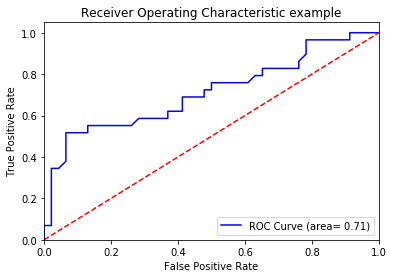

In [117]:
plt.figure
plt.plot(fpr1,tpr1,color='blue',label='ROC Curve (area= %0.2f)' %roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic example")
plt.legend(loc="lower right")
plt.show()

In [118]:
log_roc_AUCI = roc_auc_score(y_test,y_predict)
fpr,tpr,threshold= roc_curve(y_test,y_prob_test)
roc_auc = auc(fpr,tpr)

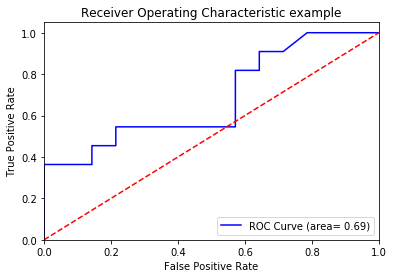

In [119]:
plt.figure
plt.plot(fpr,tpr,color='blue',label='ROC Curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic example")
plt.legend(loc="lower right")
plt.show()